<a href="https://colab.research.google.com/github/SinghNehal/Autism-Detection-In-children-Using-Facial-Images/blob/main/Autism_detection_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4/1AfDhmrjYTr3RqIIYJi-xLan60WG_kwSkb3SRSrEv53VQx24A8UoYHjKZMZ0

In [1]:
#! pip install -q keras

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import keras

In [4]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
#print(os.listdir("../drive"))
print(os.listdir("AutismDataset"))

['consolidated', 'test', 'test2', 'train', 'valid']


In [5]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from keras.applications import VGG19
from keras.models import Model
from keras import optimizers , layers, applications

###Train Dataset

In [6]:
filenames = os.listdir("AutismDataset/train")
categories = []
for filename in filenames:
    #print("opudj")
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(train_df)

                  filename category
0           Autistic.0.jpg        1
1           Autistic.1.jpg        1
2          Autistic.10.jpg        1
3         Autistic.100.jpg        1
4        Autistic.1000.jpg        1
...                    ...      ...
2535  Non_Autistic.995.jpg        0
2536  Non_Autistic.996.jpg        0
2537  Non_Autistic.997.jpg        0
2538  Non_Autistic.998.jpg        0
2539  Non_Autistic.999.jpg        0

[2540 rows x 2 columns]


In [7]:
train_df.head()

,filename,category
0,Autistic.0.jpg,1
1,Autistic.1.jpg,1
2,Autistic.10.jpg,1
3,Autistic.100.jpg,1
4,Autistic.1000.jpg,1


<AxesSubplot:>

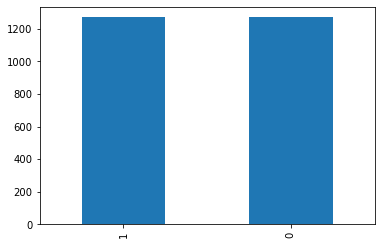

In [8]:
train_df['category'].value_counts().plot.bar()

### Test dataset

In [9]:
test_filenames = os.listdir("AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
print(test_df)

                filename
0         Autistic.0.jpg
1         Autistic.1.jpg
2        Autistic.10.jpg
3       Autistic.100.jpg
4       Autistic.101.jpg
..                   ...
295  Non_Autistic.95.jpg
296  Non_Autistic.96.jpg
297  Non_Autistic.97.jpg
298  Non_Autistic.98.jpg
299  Non_Autistic.99.jpg

[300 rows x 1 columns]


In [10]:
test_df.head()

,filename
0,Autistic.0.jpg
1,Autistic.1.jpg
2,Autistic.10.jpg
3,Autistic.100.jpg
4,Autistic.101.jpg


In [11]:
from PIL import Image
import random

### Sample Image

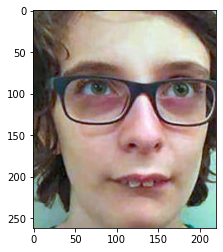

In [12]:
sample = random.choice(filenames)
image = load_img("AutismDataset/train/"+sample)
plt.imshow(image)

###Preparing Model

In [13]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 10
batch_size = 12
pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [14]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)

In [15]:
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

In [16]:
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

In [17]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

In [18]:
#transfer learning
model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9), metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 20,287,553 (77.39 MB)

 Non-trainable params: 0 (0.00 B)

###Prepare Test and Train Data


In [19]:
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()


In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

###Training Generator & *Preprocessing*


In [21]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)


Found 2286 validated image filenames belonging to 2 classes.


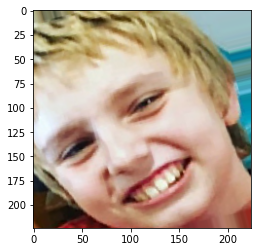

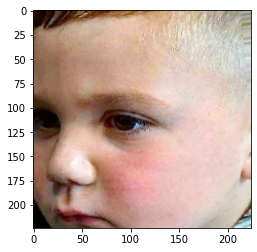

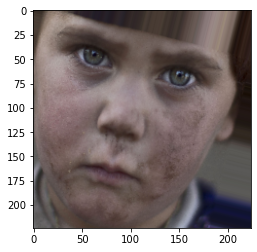

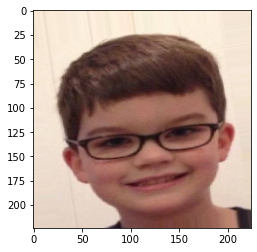

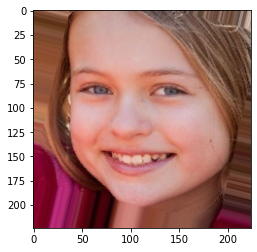

In [22]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)
x_batch, y_batch = next(train_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

###Validation Generator

Found 254 validated image filenames belonging to 2 classes.


{'0': 0, '1': 1}


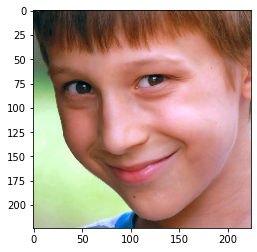

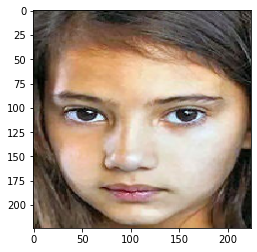

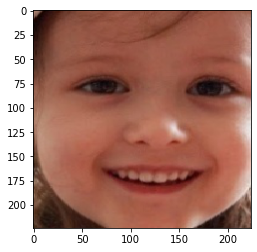

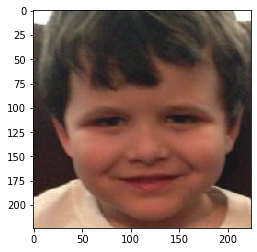

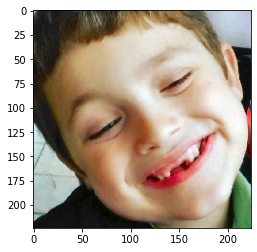

In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)
print(validation_generator.class_indices)
x_batch, y_batch = next(validation_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

###Fit Model

In [24]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 1191s 6s/step - accuracy: 0.5285 - loss: 0.7371 - val_accuracy: 0.6905 - val_loss: 0.5758
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8333 - loss: 0.2446 - val_accuracy: 1.0000 - val_loss: 0.1965
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 1378s 7s/step - accuracy: 0.6805 - loss: 0.6133 - val_accuracy: 0.6905 - val_loss: 0.5597
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6667 - loss: 0.3127 - val_accuracy: 1.0000 - val_loss: 0.1796
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 1185s 6s/step - accuracy: 0.7619 - loss: 0.5088 - val_accuracy: 0.7262 - val_loss: 0.5514
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8333 - loss: 0.2293 - val_accuracy: 1.0000 - val_loss: 0.0759
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 1174s 6s/step - accuracy: 0.7596 - loss: 0.5135 - val_accuracy: 0.7579 - val_loss: 0.4846
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 0.1181 - val_acc

In [25]:
loss, accuracy = model.evaluate(validation_generator, steps=total_validate // batch_size)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))


21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7478 - loss: 0.4980
Test: accuracy = 0.738095  ;  loss = 0.518449 


###Prepare Testing

In [26]:
test_filenames = os.listdir("AutismDataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

###Create Testing Generator


Found 300 validated image filenames.


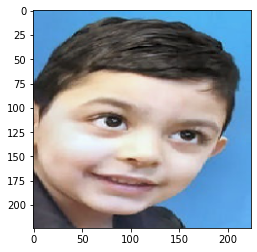

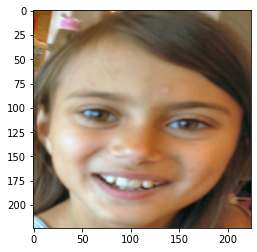

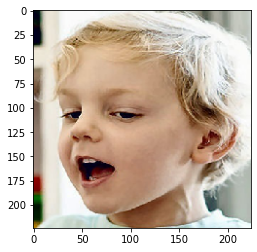

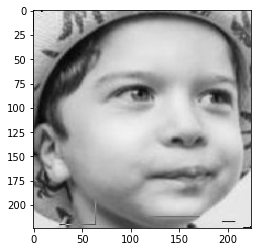

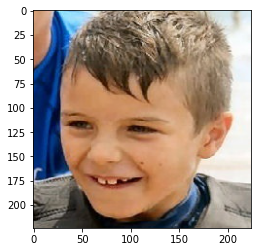

In [27]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "AutismDataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)
x_batch= next(test_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

# Prediction : 

In [28]:
threshold = 0.5
steps = int(np.ceil(nb_samples / batch_size))  # Convert to integer
predict = model.predict(test_generator, steps=steps)
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1, 0)


25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


Image name as :- actual_name(prediction {0 or 1}) , eg. autistic.127.jpg(1)

###Predicted Result

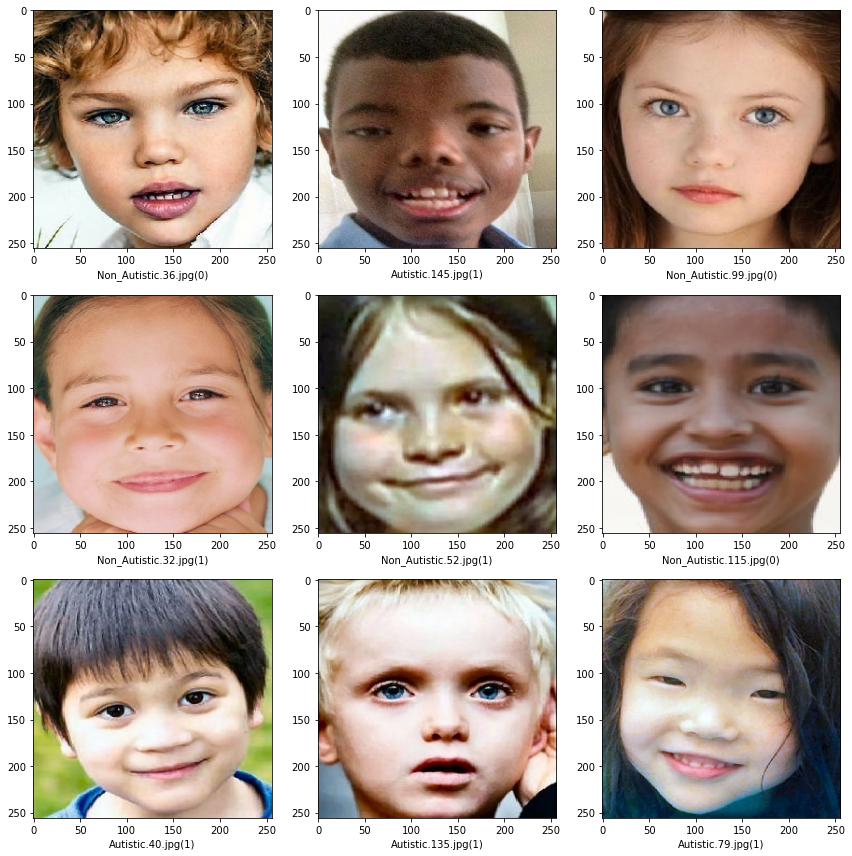

In [29]:
#See Predicted Result
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("AutismDataset/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

#Results and Analysis :

In [30]:
import seaborn as sns

### Predicted: 

In [31]:

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)


###CSV file OUTPUT

In [32]:
import pandas as pd 
pd.read_csv('submission_13010030.csv')

,id,label
0,Autistic,1
1,Autistic,1
2,Autistic,1
3,Autistic,1
4,Autistic,1
...,...,...
295,Non_Autistic,0
296,Non_Autistic,0
297,Non_Autistic,0
298,Non_Autistic,1


Text(0.5, 1.0, '(Predicted data)')

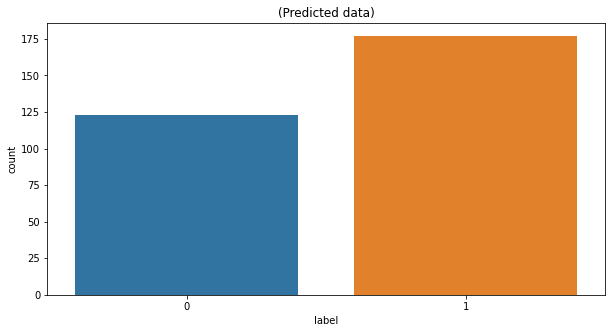

In [33]:

plt.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
plt.title("(Predicted data)")

### ACTUAL:

Text(0.5, 1.0, '(Test data)')

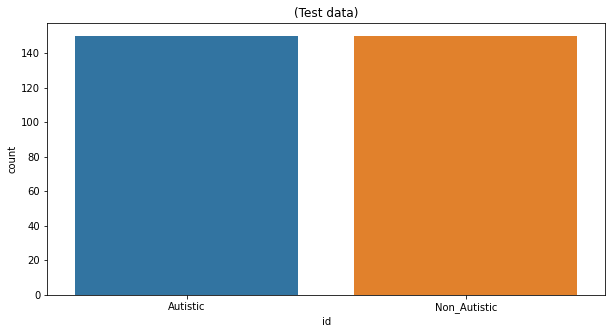

In [34]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)


plt.figure(figsize=(10,5))
sns.countplot(submission_df['id'])
plt.title("(Test data)")

### Data results: (predicted) : 

In [35]:
import csv



my_reader = csv.reader(open('submission_13010030.csv'))
predicted_autistic = 0
for record in my_reader:
    if record[1] == '1':
        predicted_autistic += 1
print("predicted Autistic : " ,predicted_autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
predicted_non_autistic = 0
for record1 in my_reader:
    if record1[1] == '0':
        predicted_non_autistic += 1
print("predicted Non Autistic : " ,predicted_non_autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
autistic = 0
for record1 in my_reader:
    if record1[0] == 'Autistic':
        autistic += 1
print("Actual Autistic : " ,autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
non_autistic = 0
for record1 in my_reader:
    if record1[0] == 'Non_Autistic':
        non_autistic += 1
print("Actual Non Autistic : " ,non_autistic)



predicted Autistic :  177
predicted Non Autistic :  123
Actual Autistic :  150
Actual Non Autistic :  150


In [36]:

#accuracy for predicting 
print("Actual Non Autistic percentage in total test data: " ,(non_autistic/300)*100,"%")
print("Predicted Non Autistic percentage in total test data: " ,(predicted_non_autistic/300)*100,"%")
print("Actual Autistic percentage in total test data: " ,(autistic/300)*100,"%")

print("Predicted Autistic percentage in total test data: " ,(predicted_autistic/300)*100,"%")


Actual Non Autistic percentage in total test data:  50.0 %
Predicted Non Autistic percentage in total test data:  41.0 %
Actual Autistic percentage in total test data:  50.0 %
Predicted Autistic percentage in total test data:  59.0 %


###Confusion Matrix

In [37]:
my_reader = csv.reader(open('submission_13010030.csv'))
true_pos = 0 #autistic,1
for record1 in my_reader:
    if record1[0] == 'Autistic' and record1[1]=='1':
        true_pos += 1
print("True positive : " ,true_pos)

my_reader = csv.reader(open('submission_13010030.csv'))
true_neg = 0 #non_autistic,0
for record1 in my_reader:
    if record1[0] == 'Non_Autistic' and record1[1]=='0':
        true_neg += 1
print("True Negative : " ,true_neg)

my_reader = csv.reader(open('submission_13010030.csv'))
false_pos = 0 #autistic,0
for record1 in my_reader:
    if record1[0] == 'Autistic' and record1[1]=='0':
       false_pos += 1
print("false Positive : " ,false_pos)

my_reader = csv.reader(open('submission_13010030.csv'))
false_neg = 0 #non_autistic,1
for record1 in my_reader:
    if record1[0] == 'Non_Autistic' and record1[1]=='1':
       false_neg += 1
print("false Negative : " ,false_neg)

True positive :  137
True Negative :  110
false Positive :  13
false Negative :  40


###Accuracy

In [38]:
accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg)
print("Accuracy is: ",accuracy*100,"%")

Accuracy is:  82.33333333333334 %


###Precision

In [39]:
precision = true_pos / ( true_pos + false_pos)
print("Precision is: ",precision*100,"%")

Precision is:  91.33333333333333 %


###Sensitivity

In [40]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity is: ",sensitivity*100,"%")

Sensitivity is:  77.40112994350282 %


###Specificity

In [41]:
Specificity =true_neg / (true_neg + false_pos)
print("Specificity is: ",Specificity*100,"%")

Specificity is:  89.43089430894308 %


# Result on OUR FACES (TAKING REAL DATASET)

### Loading Testing data

In [42]:
test_filenames2 = os.listdir("AutismDataset/test2")
test_df2 = pd.DataFrame({
    'filename': test_filenames2
})
print(test_df2)


                  filename
0      real-autistic.2.jpg
1      real_autistic.1.jpg
2  real_non_autistic.3.jpg
3  real_non_autistic.4.jpg


In [43]:
nb_samples2 = test_df2.shape[0]

### preparing Testing Generator

Found 4 validated image filenames.


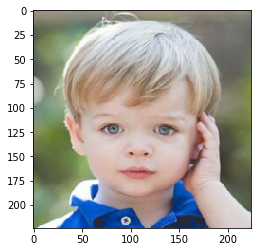

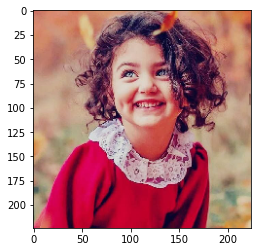

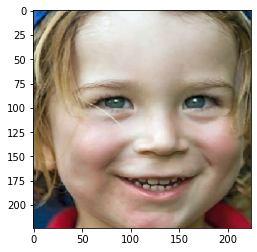

In [44]:
test_gen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_gen.flow_from_dataframe(
    test_df2, 
    "AutismDataset/test2/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)
x_batch2= next(test_generator2)
for i in range (0,3):
    image = x_batch2[i]
    plt.imshow(image)
    plt.show()

### Prediction

In [47]:
threshold = 0.5
steps2 = int(np.ceil(nb_samples2 / batch_size))  # Convert to integer
predict2 = model.predict(test_generator2, steps=steps2)
test_df2['category'] = np.where(predict2 > threshold, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


### Prediction Result

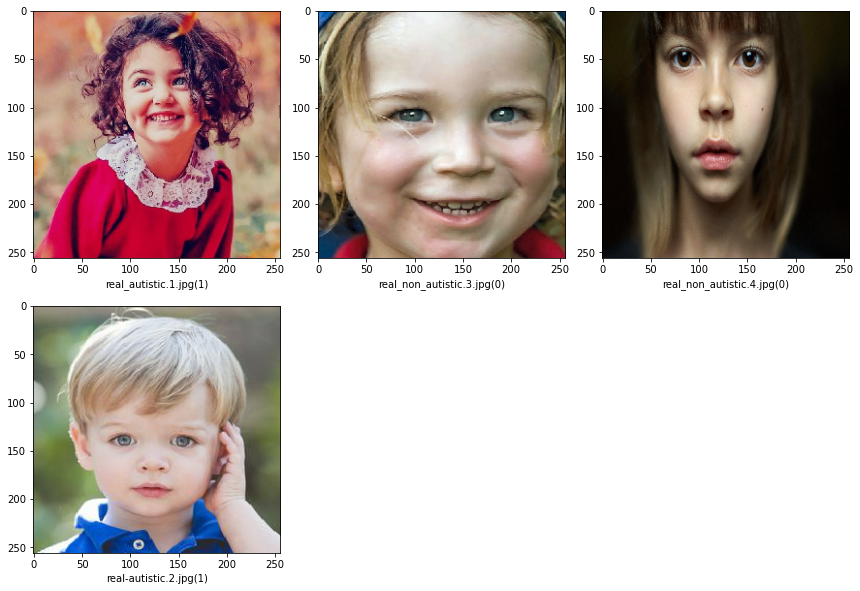

In [48]:
#See Predicted Result
sample_test2 = test_df2.sample(n=4).reset_index()
sample_test2.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test2.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("AutismDataset/test2/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [49]:
submission_df = test_df2.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_130100301.csv', index=False)

In [50]:
import pandas as pd 
pd.read_csv('submission_130100301.csv')

,id,label
0,real-autistic,1
1,real_autistic,1
2,real_non_autistic,0
3,real_non_autistic,0
